# optimisation_boxplot

Outdated - to see updated version visit "data_selection_and_cleaning"

In [61]:
# libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer

from scipy.stats import kurtosis, skew



In [73]:
# define scalers
def tanh(x):
    return np.tanh(x)

def root(x, power, inverse = False):
    return x ** power if not inverse else x ** 1/power


def log(x, inverse = False):
    return np.log(x) if not inverse else np.exp(x)

def exp(x):
    return np.exp(x)

def root_2(x):
    return x ** 1/2

def root_3(x):
    return x ** 1/3


def root_one_half(x):
    return x ** 1/1.5

def square(x):
    return x ** 2

def cube(x):
    return x ** 3

activations = [log, exp, root_2, root_3, root_one_half, square, cube, tanh]
transformers = [RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer]

#def reflect(x):
#    return np.abs(-x)




In [35]:
path = 'boston_fixed.csv'
df = pd.read_csv(path, index_col = 0)
df.head()

,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
178,Arlington,29,3567,-77.098798,38.872313,29.9,29.9,0.06642,0.0,4.05,0,0.51,6.860,74.4,2.9153,5,296,16.6,391.27,6.92
177,Arlington,29,3566,-77.097298,38.875713,24.6,24.6,0.05425,0.0,4.05,0,0.51,6.315,73.4,3.3175,5,296,16.6,395.60,6.29
176,Arlington,29,3565,-77.095098,38.878213,23.2,23.2,0.07022,0.0,4.05,0,0.51,6.020,47.2,3.5549,5,296,16.6,393.23,10.11
175,Arlington,29,3564,-77.105798,38.888213,29.4,29.4,0.06664,0.0,4.05,0,0.51,6.546,33.1,3.1323,5,296,16.6,390.96,5.33
174,Arlington,29,3563,-77.124298,38.885713,22.6,22.6,0.08447,0.0,4.05,0,0.51,5.859,68.7,2.7019,5,296,16.6,393.23,9.64


In [13]:
# geographicals / fixed: INDUS, DIS, RAD
# things that you might want to change, CMEDV, CRIM, AGE, LSTAT

X_cols = ['CMEDV', 'CRIM', 'INDUS', 'AGE', 'DIS', 'LSTAT', 'RAD']
y_col = ['NOX']

In [69]:
X = df[X_cols]
y = df[y_col]

In [106]:
def plotting(x, activation = None, normalization = None, plot = True):
    x_cols = x.columns
    x = np.asarray(x)

    if activation:
        x = activation(x)
        activation = activation.__name__.upper()
    else:
        activation = 'NONE'
        
        
    if normalization:
        x = normalization().fit_transform(x)
        normalization = normalization.__name__.upper()
    else:
        normalization = 'NONE'
        
    # code for skewness    
    kurt = kurtosis(x)
    skewness = skew(x)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    fig.suptitle(('The distribution of the data with {} normalization for an activation'
                  ' function of {}'.format(normalization ,activation)), fontsize=16)
    
    for i in range(x.shape[1]):
        ax[0].hist(x[:,i], alpha = 0.2)
    ax[0].legend(x_cols)
    if plot:
        ax[1] = sns.boxplot(data = x)
    plt.xticks(rotation=15)
    return (fig, ax), (kurt, skewness)

<ipython-input-111-46e5b4387839>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y'] = y
/Users/yousefnami/opt/anaconda3/envs/ai_hack_2021/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Users/yousefnami/opt/anaconda3/envs/ai_hack_2021/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
<ipython-input-106-cdf82bce52da>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning,

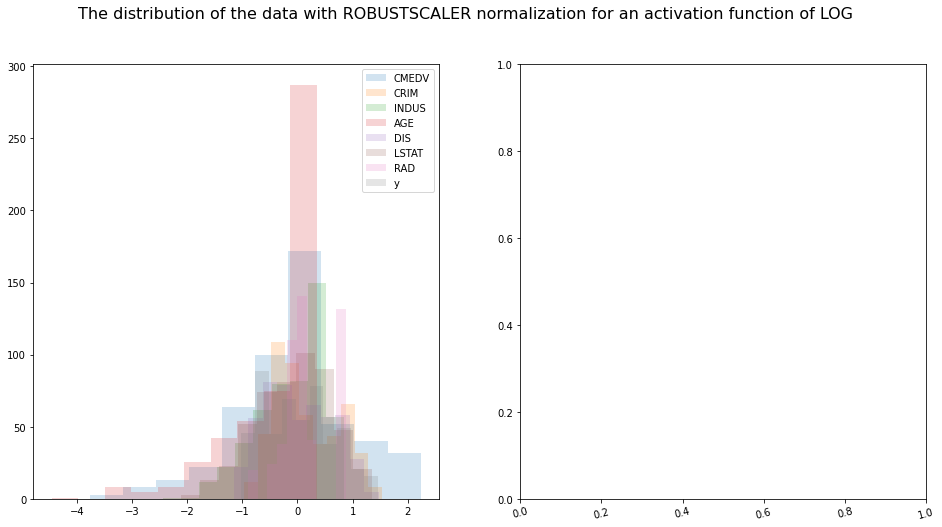

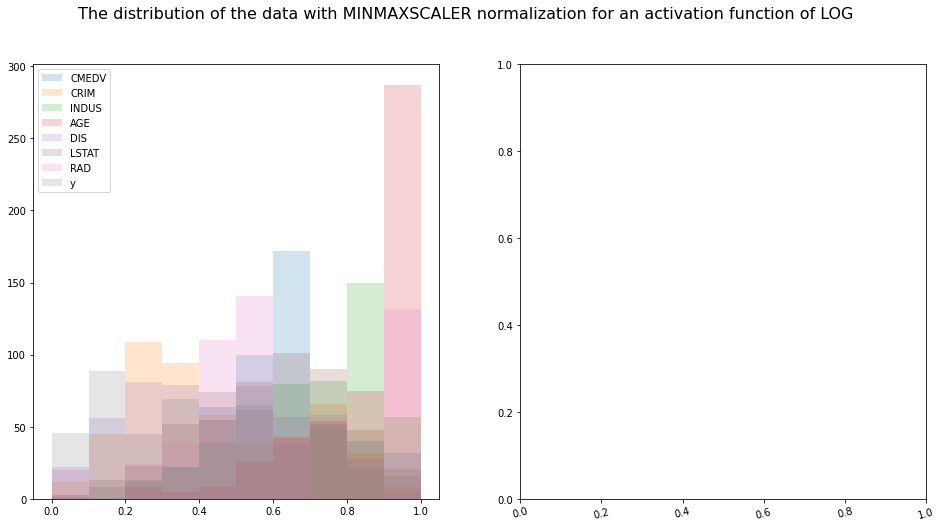

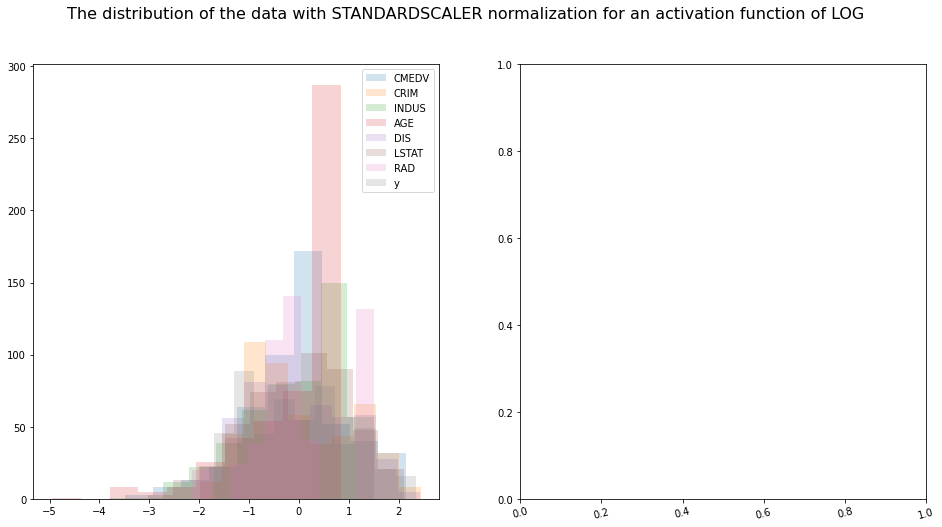

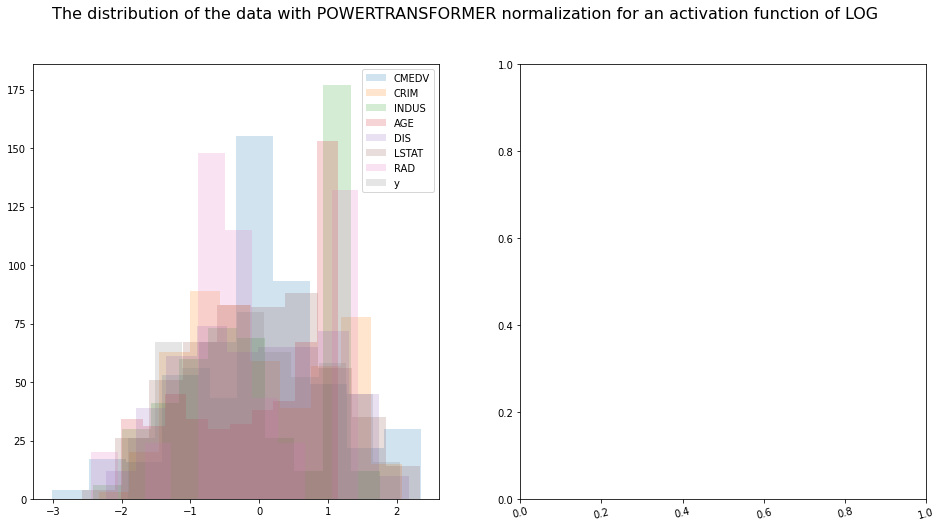

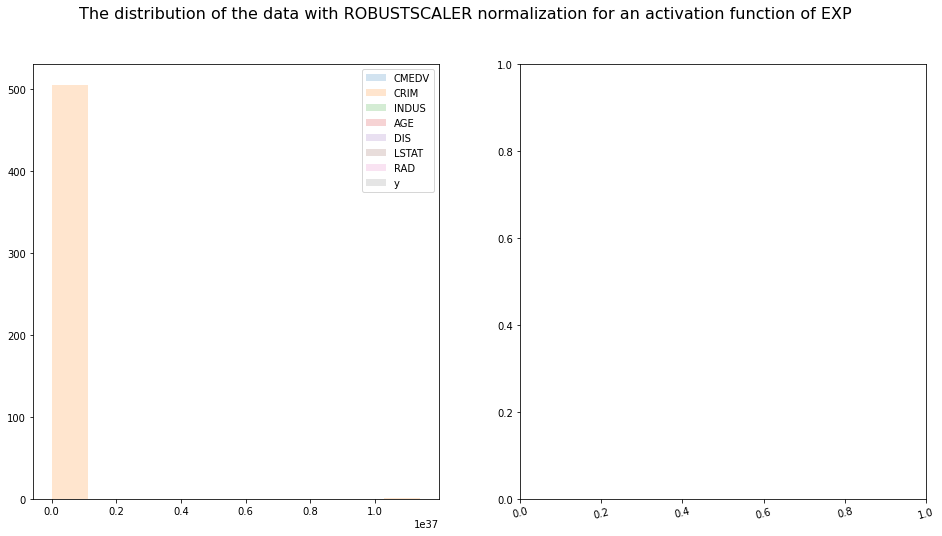

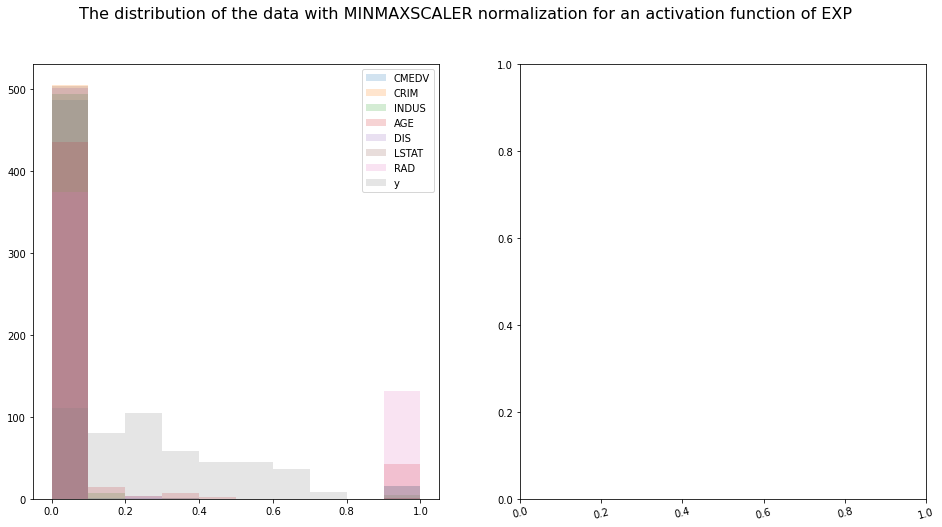

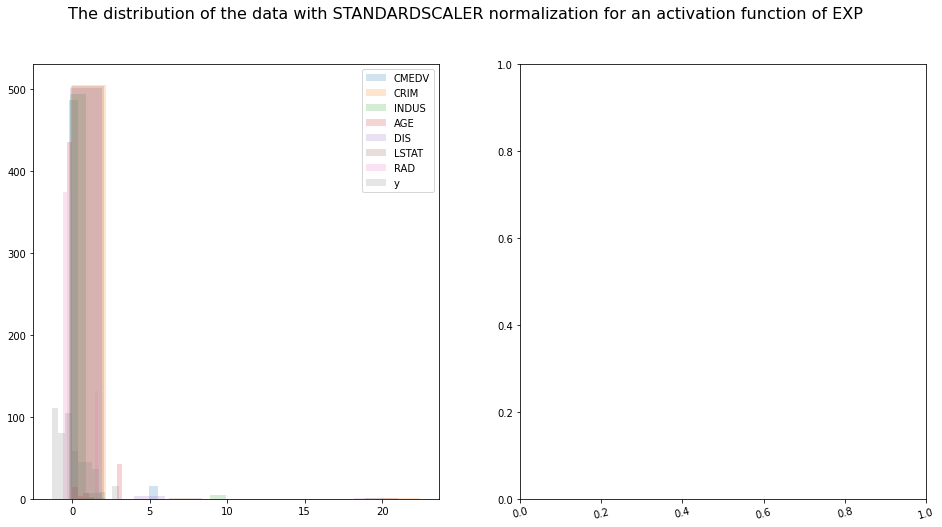

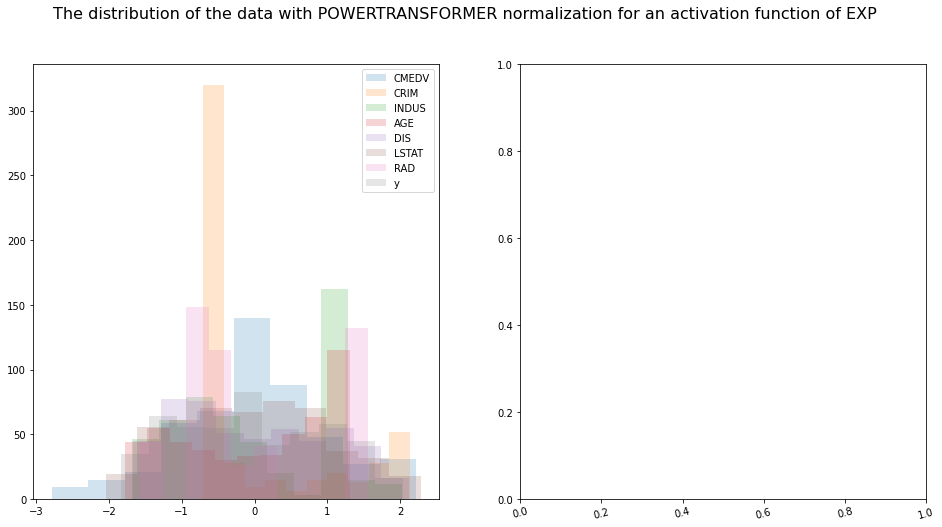

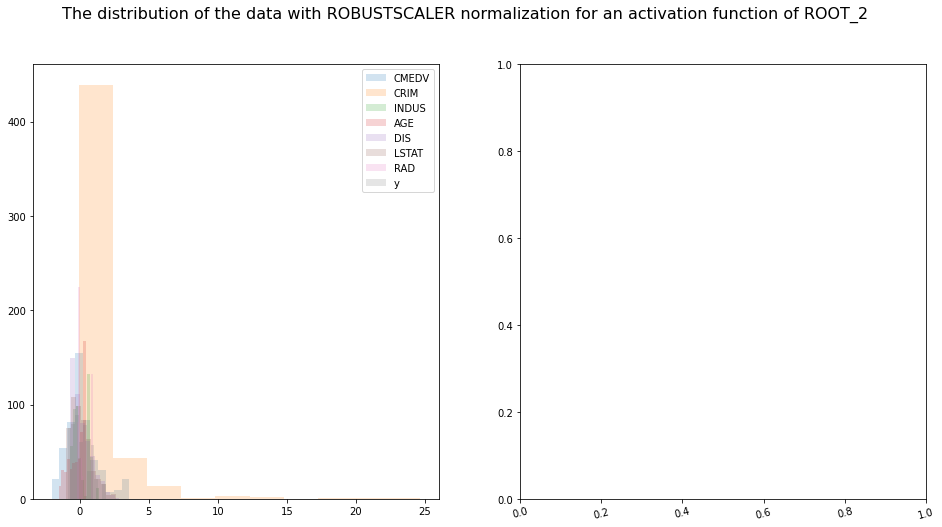

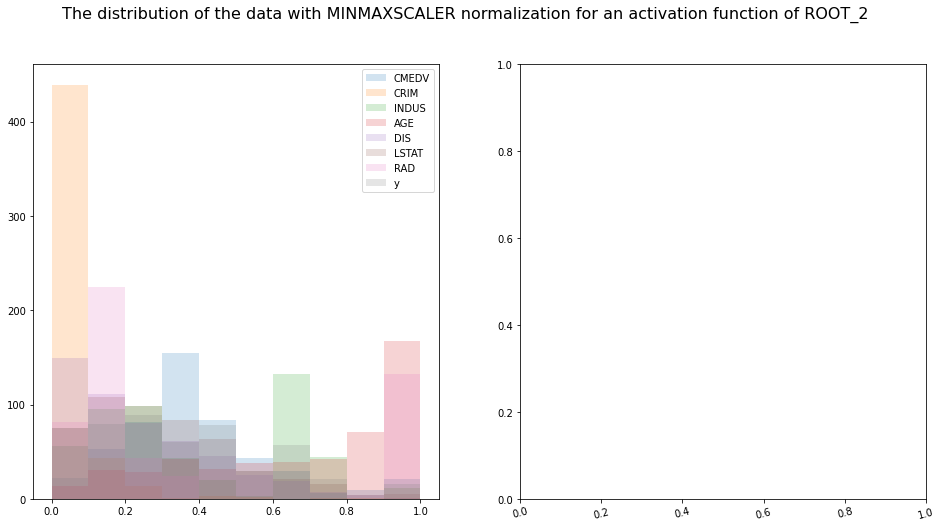

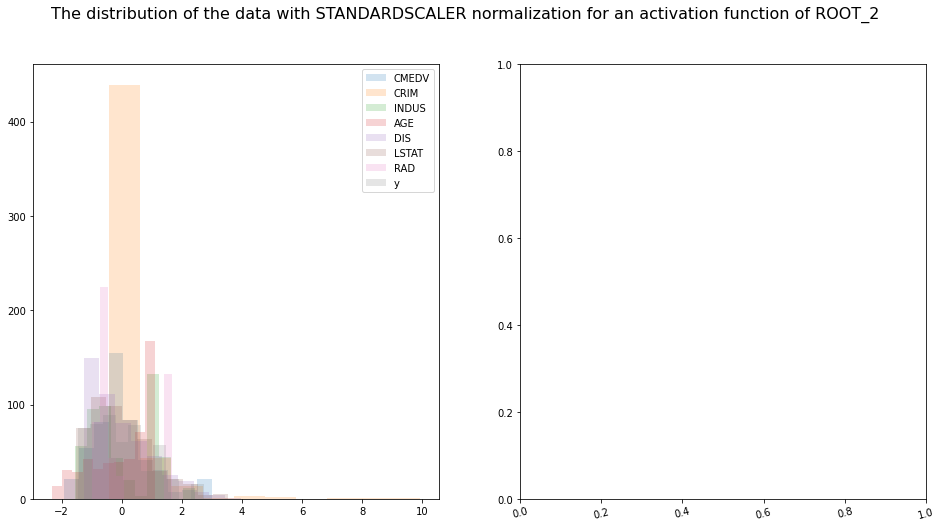

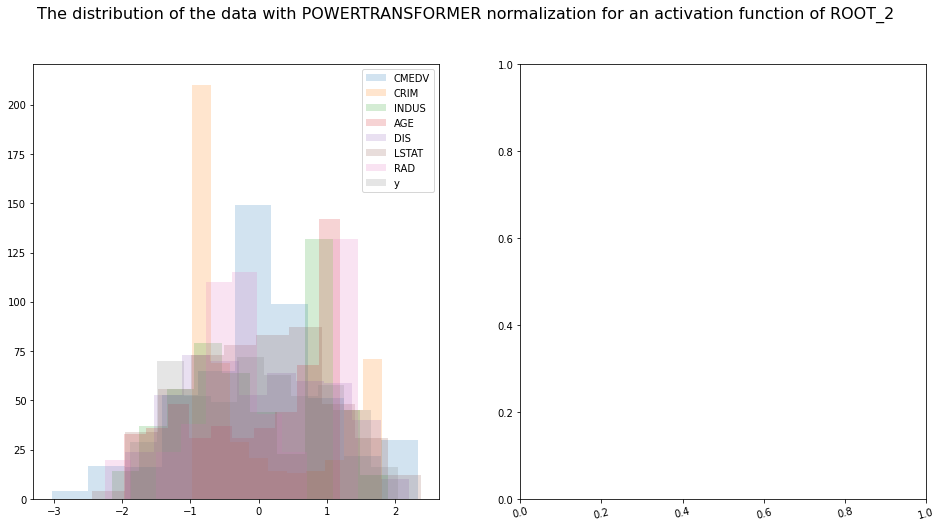

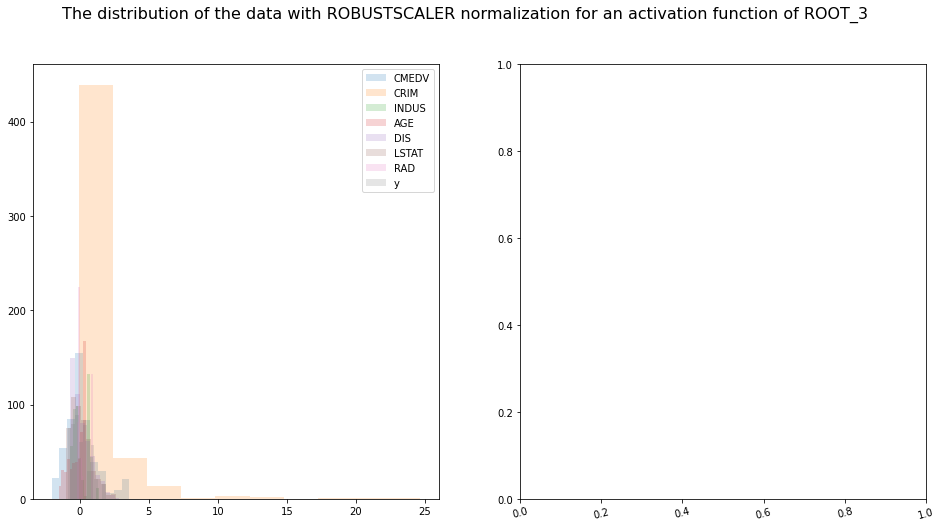

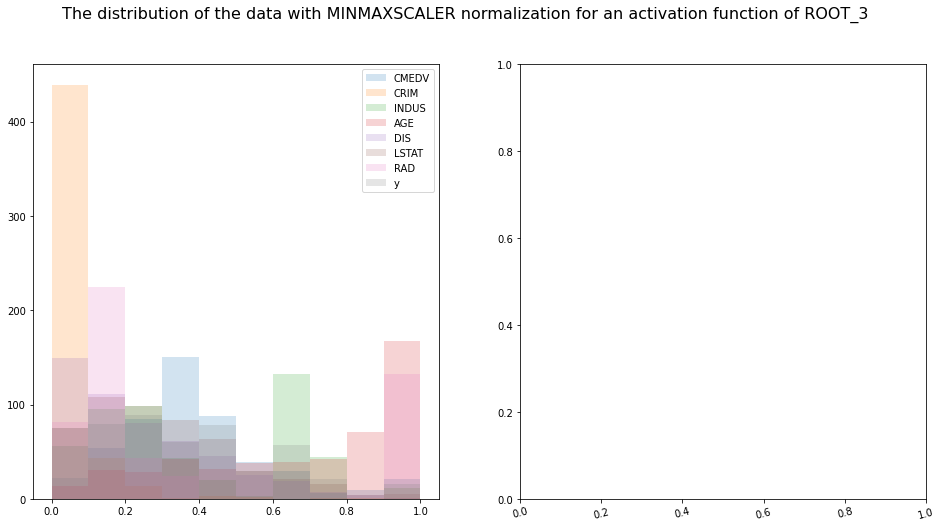

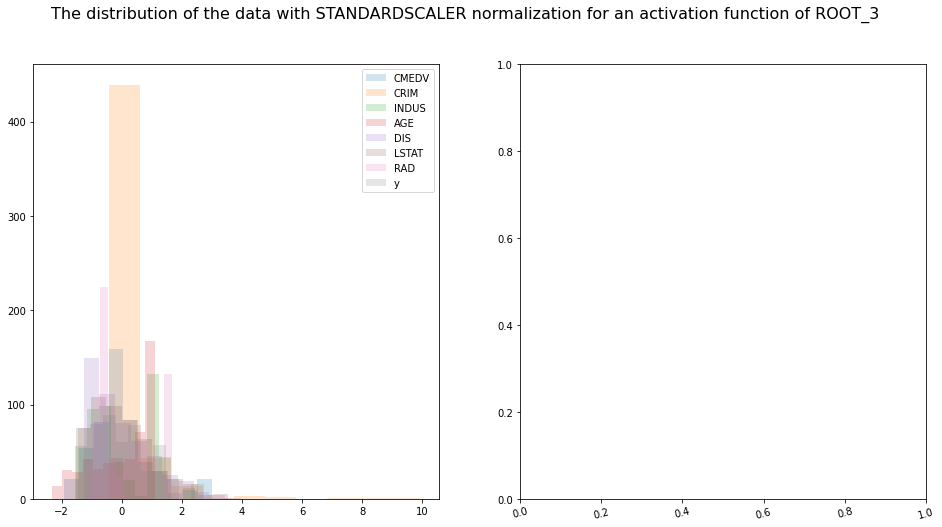

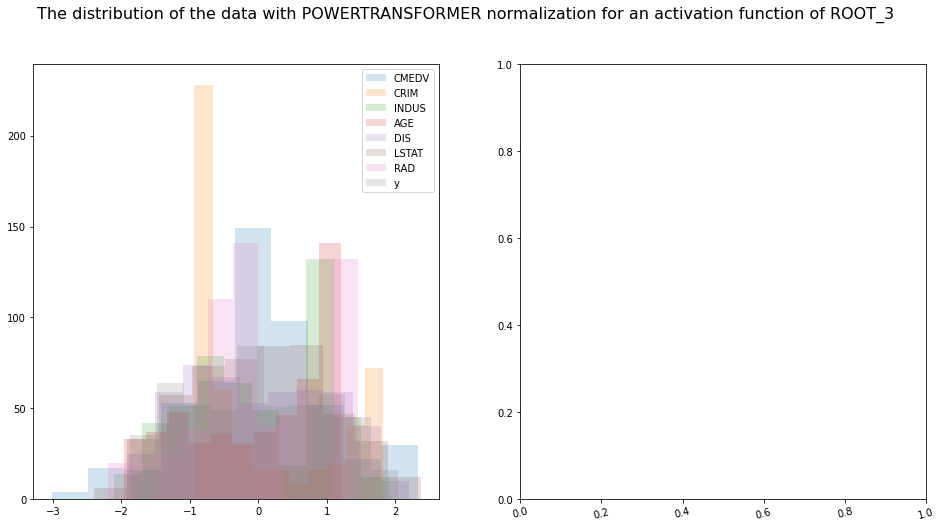

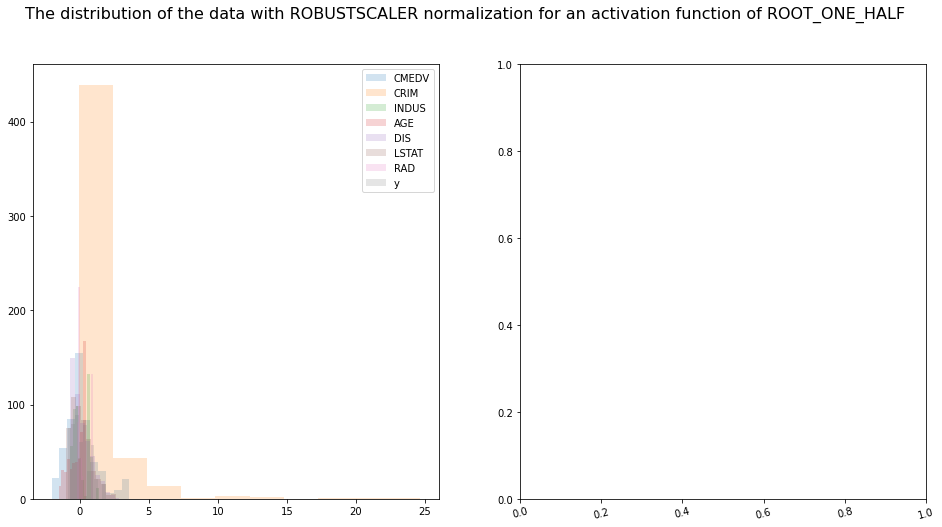

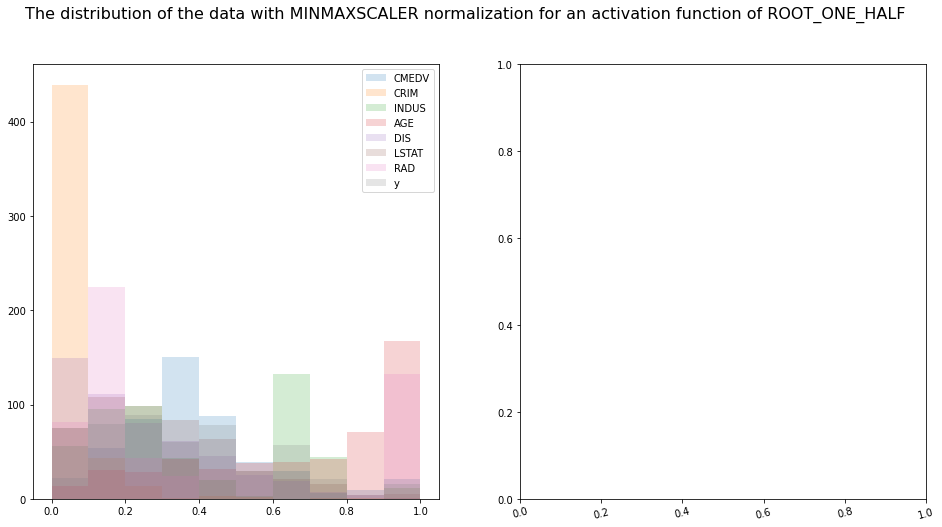

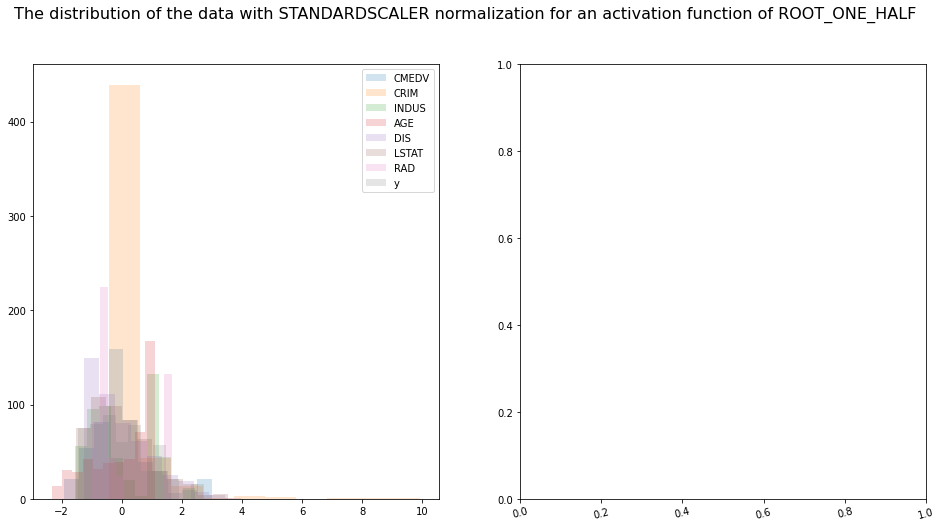

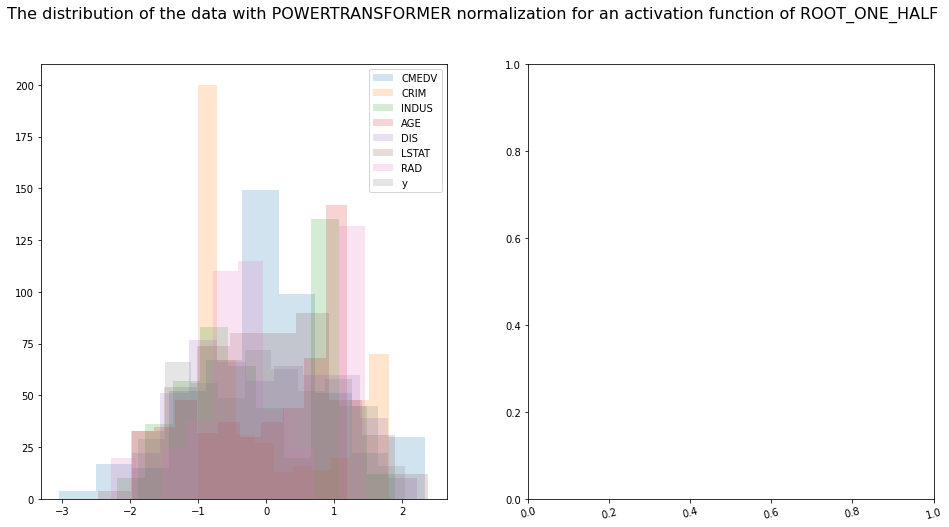

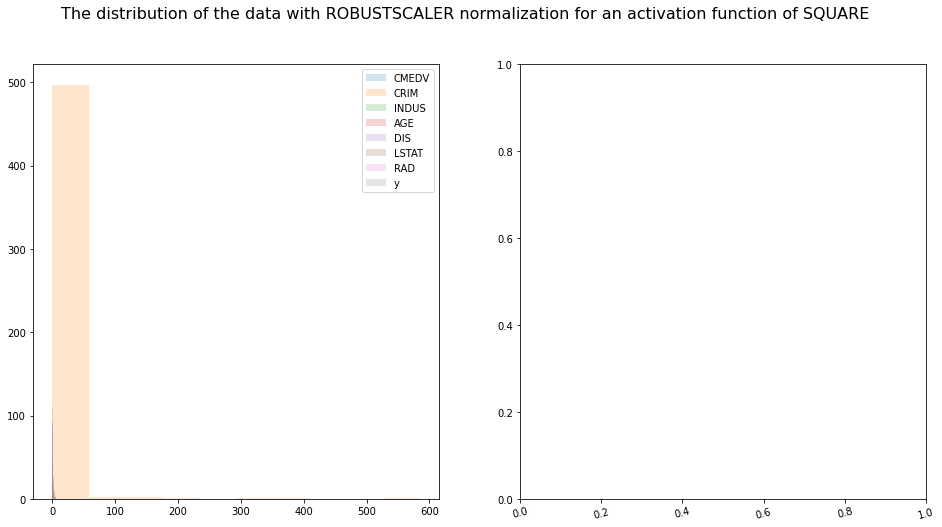

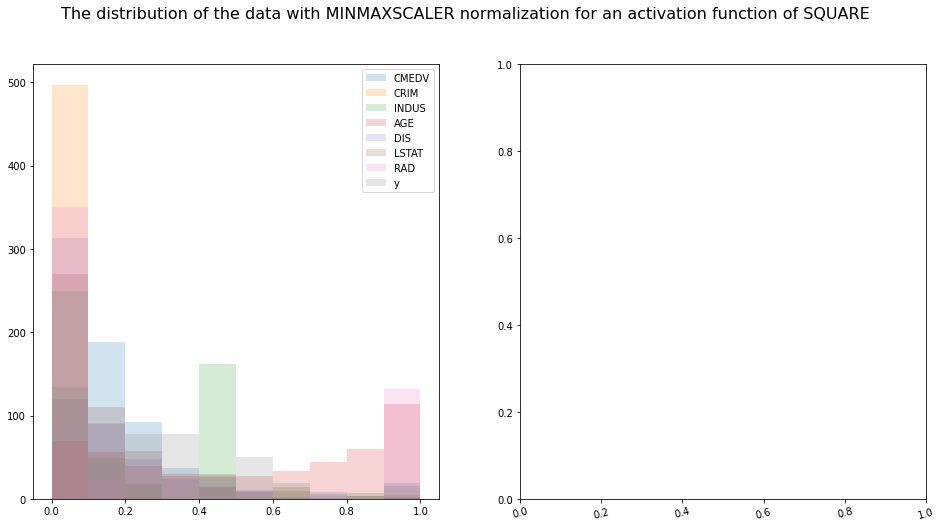

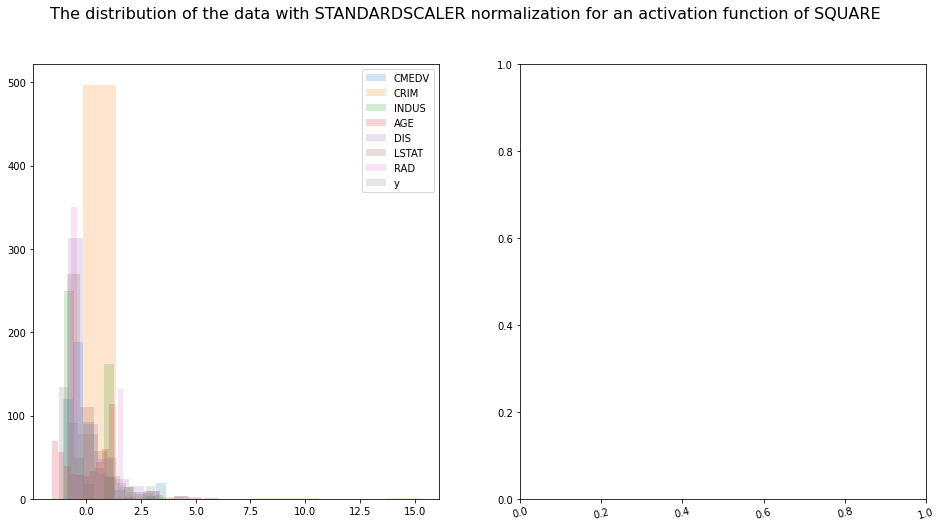

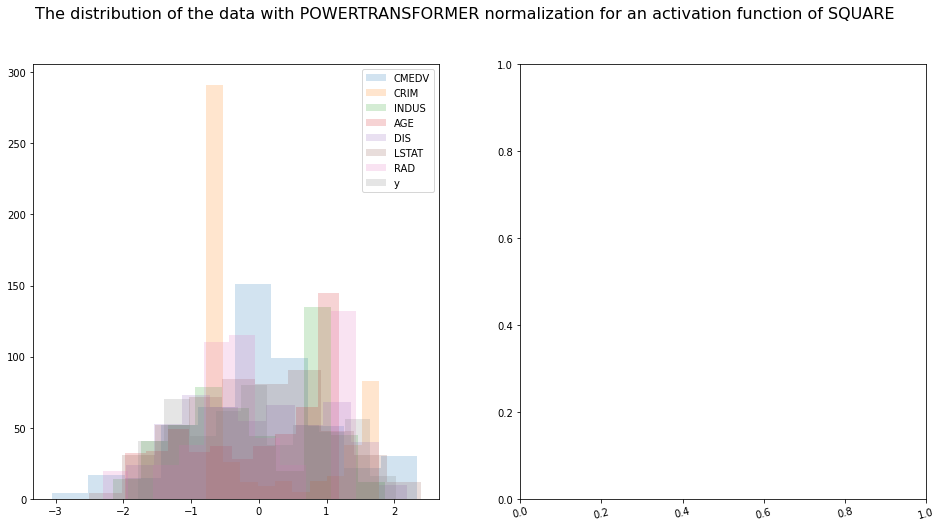

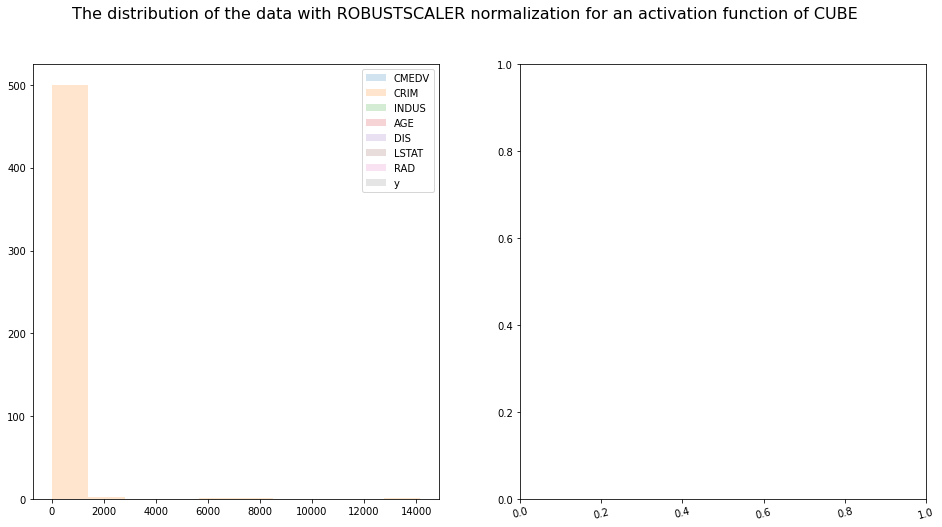

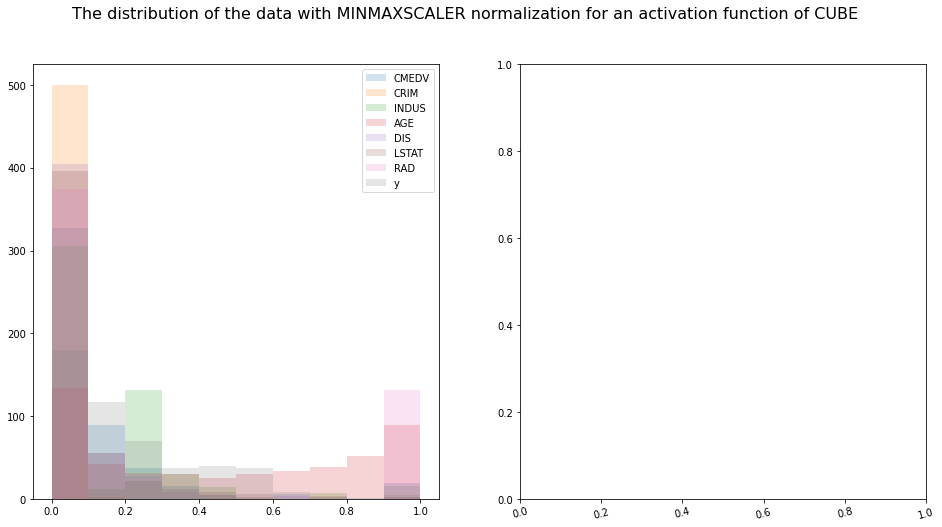

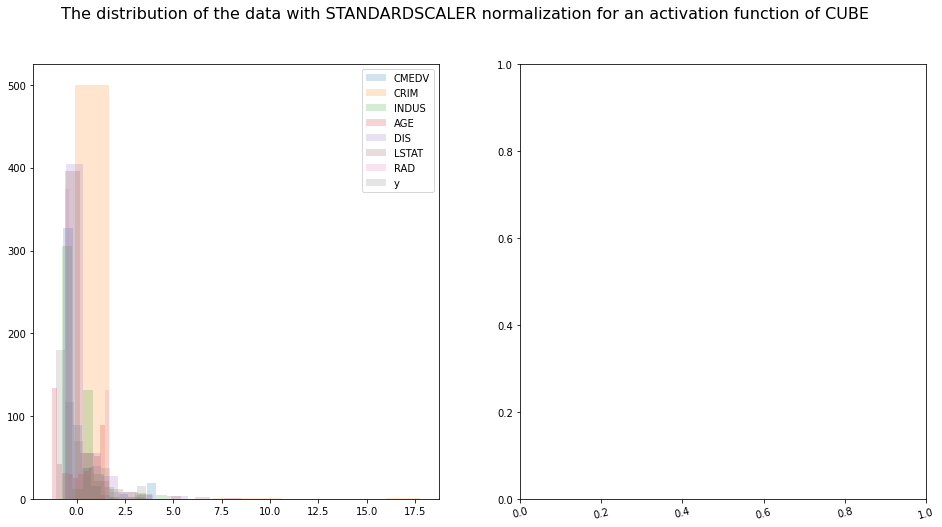

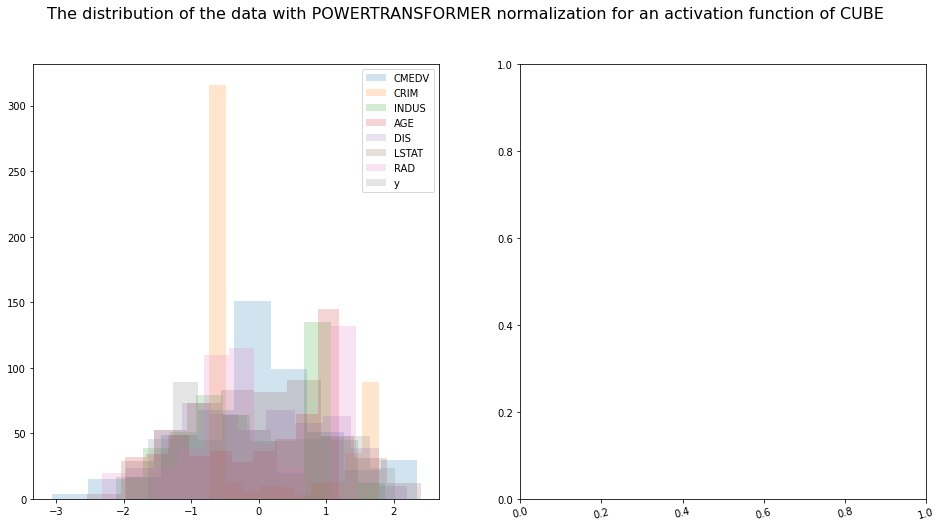

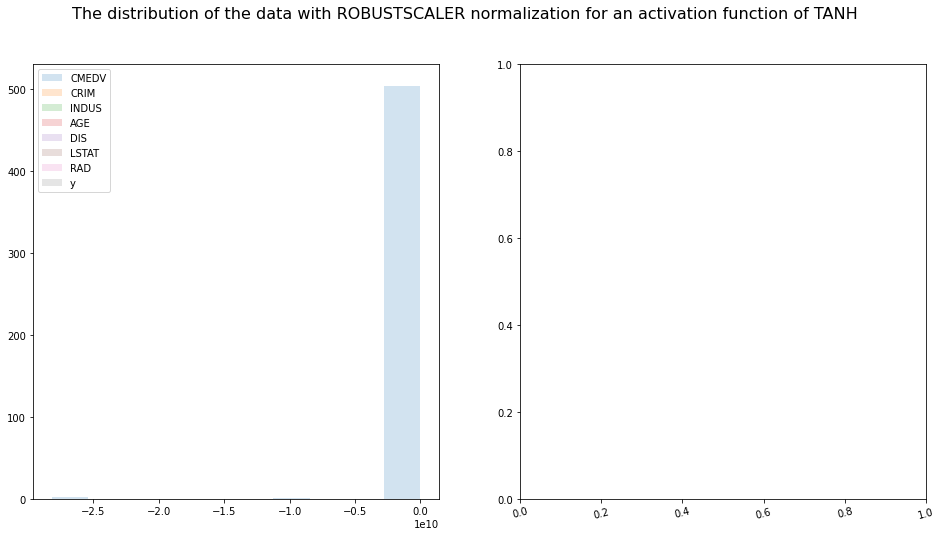

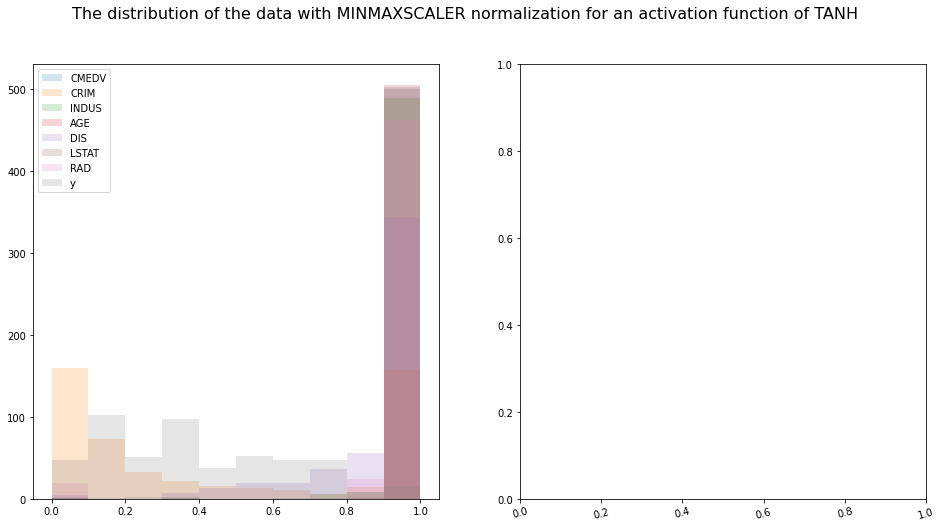

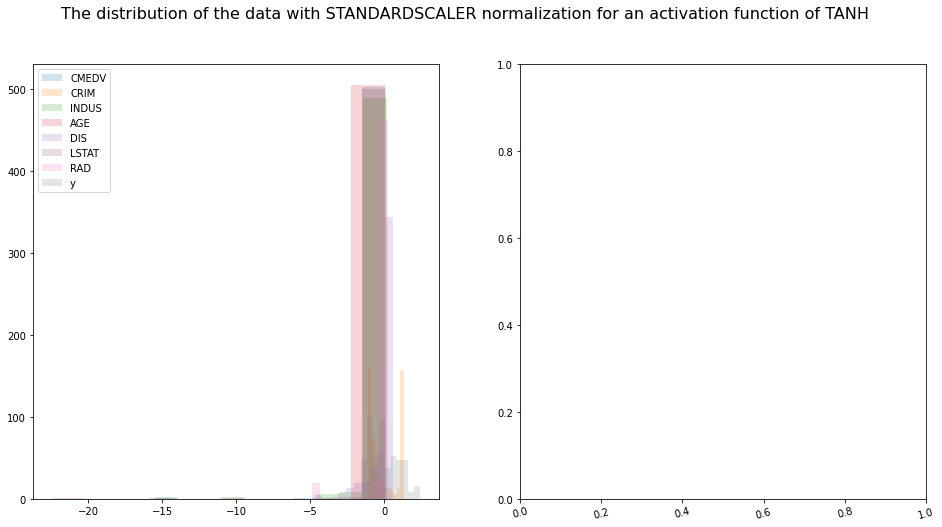

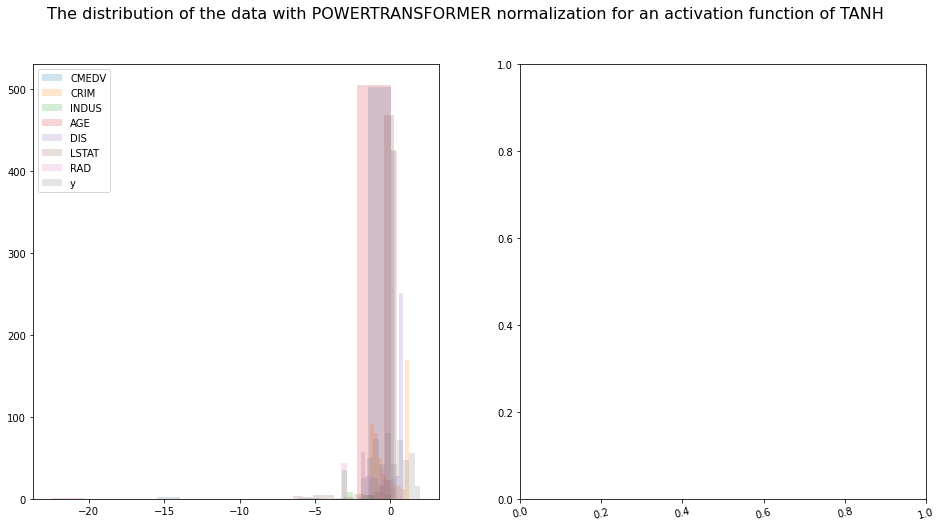

In [111]:
X['y'] = y
skewness_bounds = 3
kurtosis_bounds = 7
min_kurt = np.asarray([3 for item in X.columns])
min_skew = np.asarray([1 for item in X.columns])
ideal_transformers = np.asarray(['BLANK' for item in X.columns])
ideal_activations = np.asarray(['BLANK' for item in X.columns])
for activation in activations:
    for transformer in transformers:
        plot, props = plotting(X, activation, transformer, plot = False)
        min_kurt[
            np.logical_and(np.abs(props[0]) < min_kurt,  np.abs(props[1]) < min_skew)
        ] = props[0][
            np.logical_and(np.abs(props[0]) < min_kurt,  np.abs(props[1]) < min_skew)
        ]
        
        min_skew[
            np.logical_and(np.abs(props[0]) < min_kurt,  np.abs(props[1]) < min_skew)
        ]= props[1][
            np.logical_and(np.abs(props[0]) < min_kurt,  np.abs(props[1]) < min_skew)
        ]
        ideal_transformers[
            np.logical_and(np.abs(props[0]) < min_kurt,  np.abs(props[1]) < min_skew)
        ] = transformer
        
        ideal_activations[
            np.logical_and(np.abs(props[0]) < min_kurt,  np.abs(props[1]) < min_skew)
        ] = activation

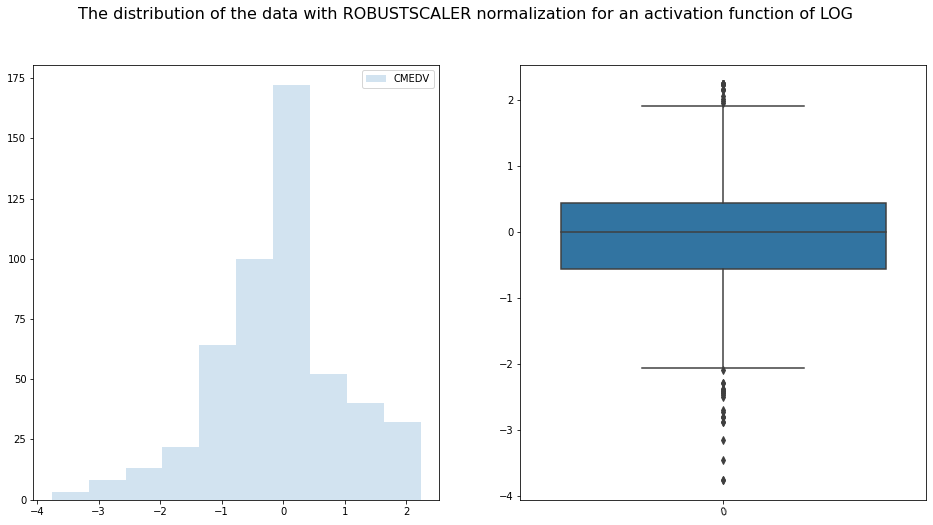

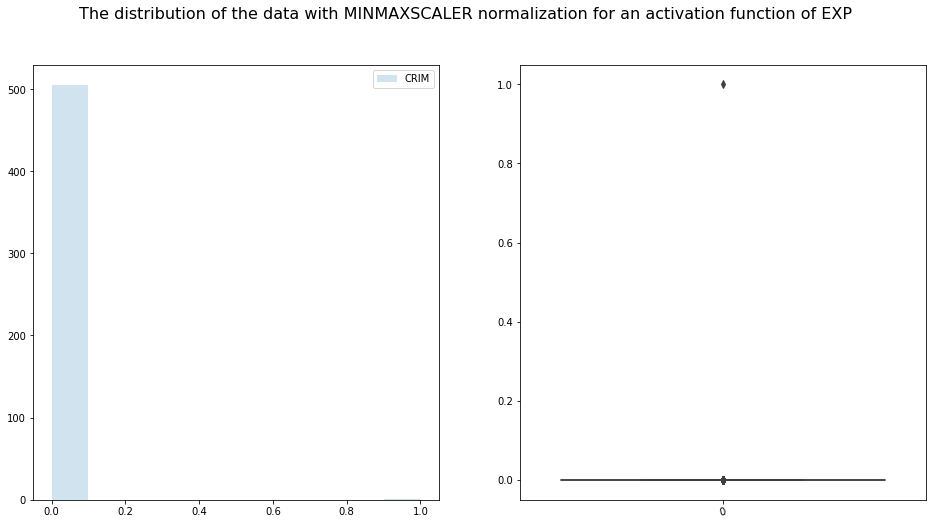

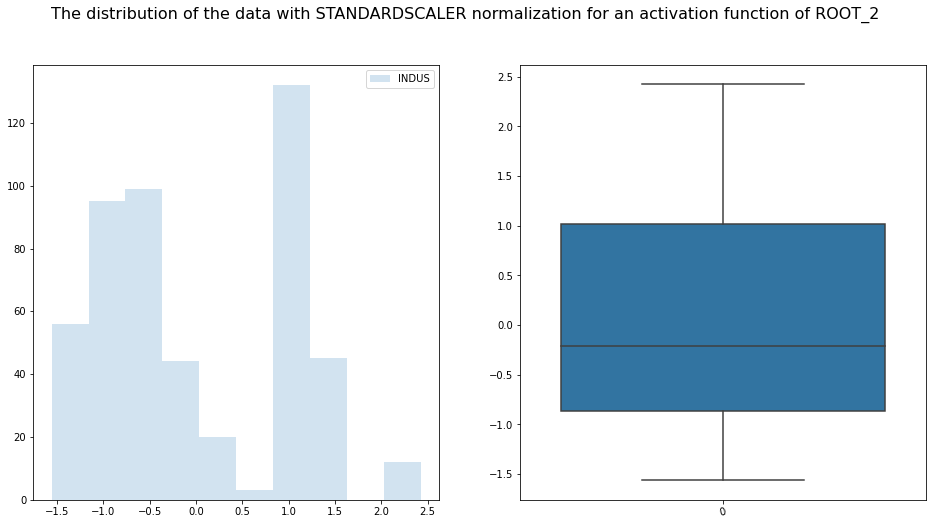

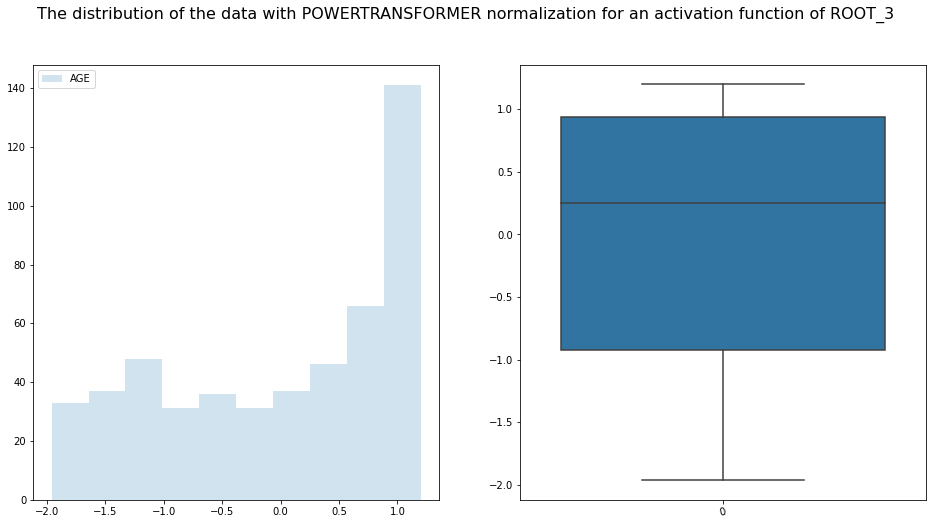

In [121]:
for name, activation, transformer in zip(X.columns, activations, transformers):
    plotting(X[name].to_frame(), activation, transformer)

In [119]:
isinstance(X, pd.DataFrame)

True